<a href="https://colab.research.google.com/github/usnhee/TIL-/blob/master/Clustering_H_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import math
%matplotlib inline

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns = iris.feature_names)
print(iris_data_pd)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


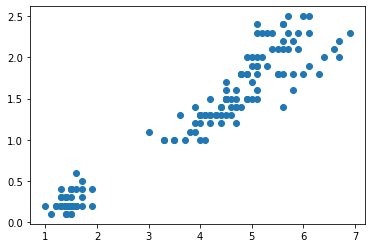

In [2]:
petals =pd.DataFrame(iris_data_pd.values[:,2:4], columns = ['petal length (cm)', 'petal width (cm)'])
plt.scatter(petals.values[:,0], petals.values[:,1])
plt.show()

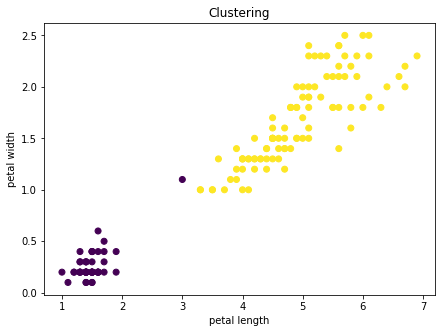

In [3]:
from sklearn.cluster import KMeans

plt.figure(figsize=(7,5))
km = KMeans(n_clusters=2, random_state=20)
km.fit(iris_data_pd.iloc[:,2:4])
y_pred=km.predict(iris_data_pd.iloc[:,2:4])

plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
plt.title("Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.show()

In [6]:
## 각 기준점으로부터의 euclidian 거리 계산 

def distance(x1,y1,x2,y2):
  dx = x2-x1 
  dy = y2-y1
  squared = dx**2 + dy**2
  result = math.sqrt(squared)
  return result

print(' 0 cluster distance: ', distance(iris_data_pd.iloc[98,2], iris_data_pd.iloc[98,3], km.cluster_centers_[0][0], km.cluster_centers_[0][1]))
print(' 0 cluster distance: ', distance(iris_data_pd.iloc[98,2], iris_data_pd.iloc[98,2], km.cluster_centers_[1][0], km.cluster_centers_[1][1]))



 0 cluster distance:  1.7246990164733285
 0 cluster distance:  2.333281078605051


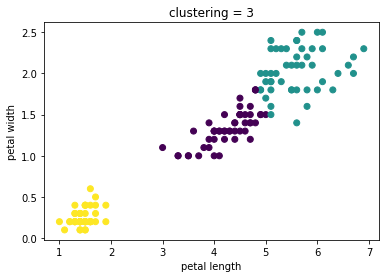

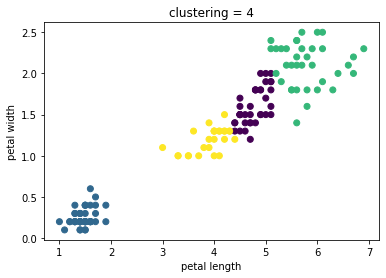

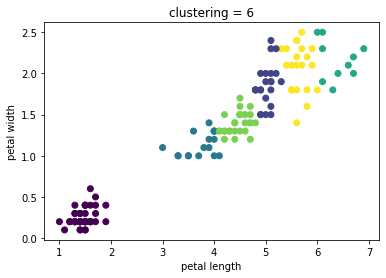

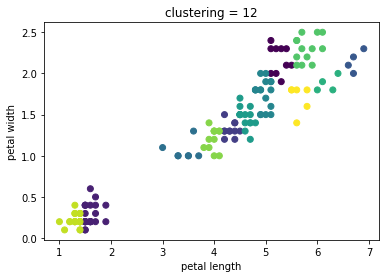

In [11]:
## 클러스터 분류 갯수 바꿔보면서 확인하기 
from sklearn.cluster import KMeans
n_cluster = [3,4,6,12]

for i in n_cluster: 
  count = 1
  km=KMeans(n_clusters = i , random_state=20)
  km.fit(iris_data_pd.iloc[:,2:4])
  y_pred = km.predict(iris_data_pd.iloc[:,2:4])
  plt.figure(count)
  plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
  plt.title("clustering = "+str(i))
  plt.xlabel('petal length')
  plt.ylabel('petal width')
  count +=1
  plt.show()

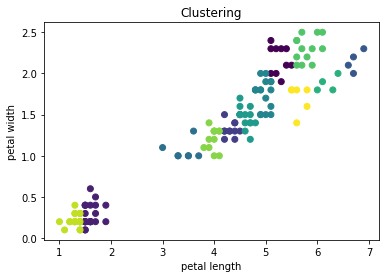

In [13]:
## Voronoi 그래프 

km12 = KMeans(n_clusters=8, random_state=20)
km12.fit(iris_data_pd.iloc[:,2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:,2:4])
plt.title("Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
graph1 = plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
plt.show()

h= .02 # point in the mesh[x_min, x_max]x[y_min, y_max].
km12 = KMeans(n_clusters = 8, random_state=20)
km12.fit(iris_data_pd.iloc[:,2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:,2:4])

#plot the decision boundary. For that, assign a color to each 
x_min, x_max = iris_data_pd.iloc[:,2].min() -1, iris_data_pd.iloc[:,2].max() +1
y_min, y_max = iris_data_pd.iloc[:,3].min() -1, iris_data_pd.iloc[:,3].max() +1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
z = km12.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)
plt.figure(1) ## subplot 
plt.clf()
plt.imshow(z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(),yy.max()), cmap=plt.cm.Paired, aspect='auto',origin='lower')
plt.plot(iris_data_pd.iloc[:,0], centroids[:,1], marker='^', s=16, linewidths=3, color='r',zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [14]:
## Hierarchical Clustering

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math 

data = pd.read_csv('Fish.csv', sep = ',')
print(data)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


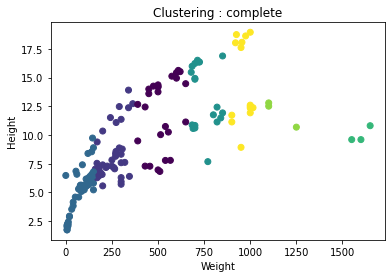

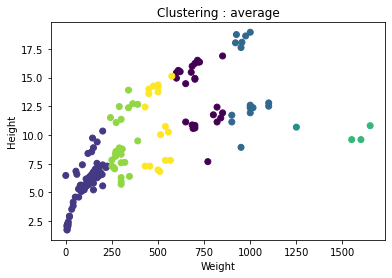

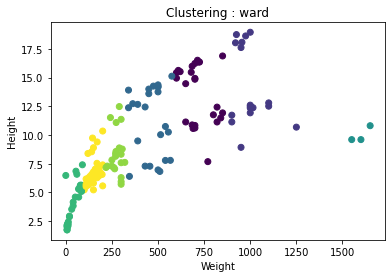

In [16]:

from sklearn.cluster import AgglomerativeClustering

linkage = ['complete', 'average', 'ward']
for idx, i in enumerate(linkage):
  plt.figure(idx)
  hier = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage=i)
  hier.fit(data.iloc[:,[1,5]])  ## weight 와 height 
  
  plt.scatter(data.iloc[:,1], data.iloc[:,5], c= hier.labels_)
  plt.title('Clustering : '+i)
  plt.xlabel('Weight')
  plt.ylabel('Height')

plt.show() 


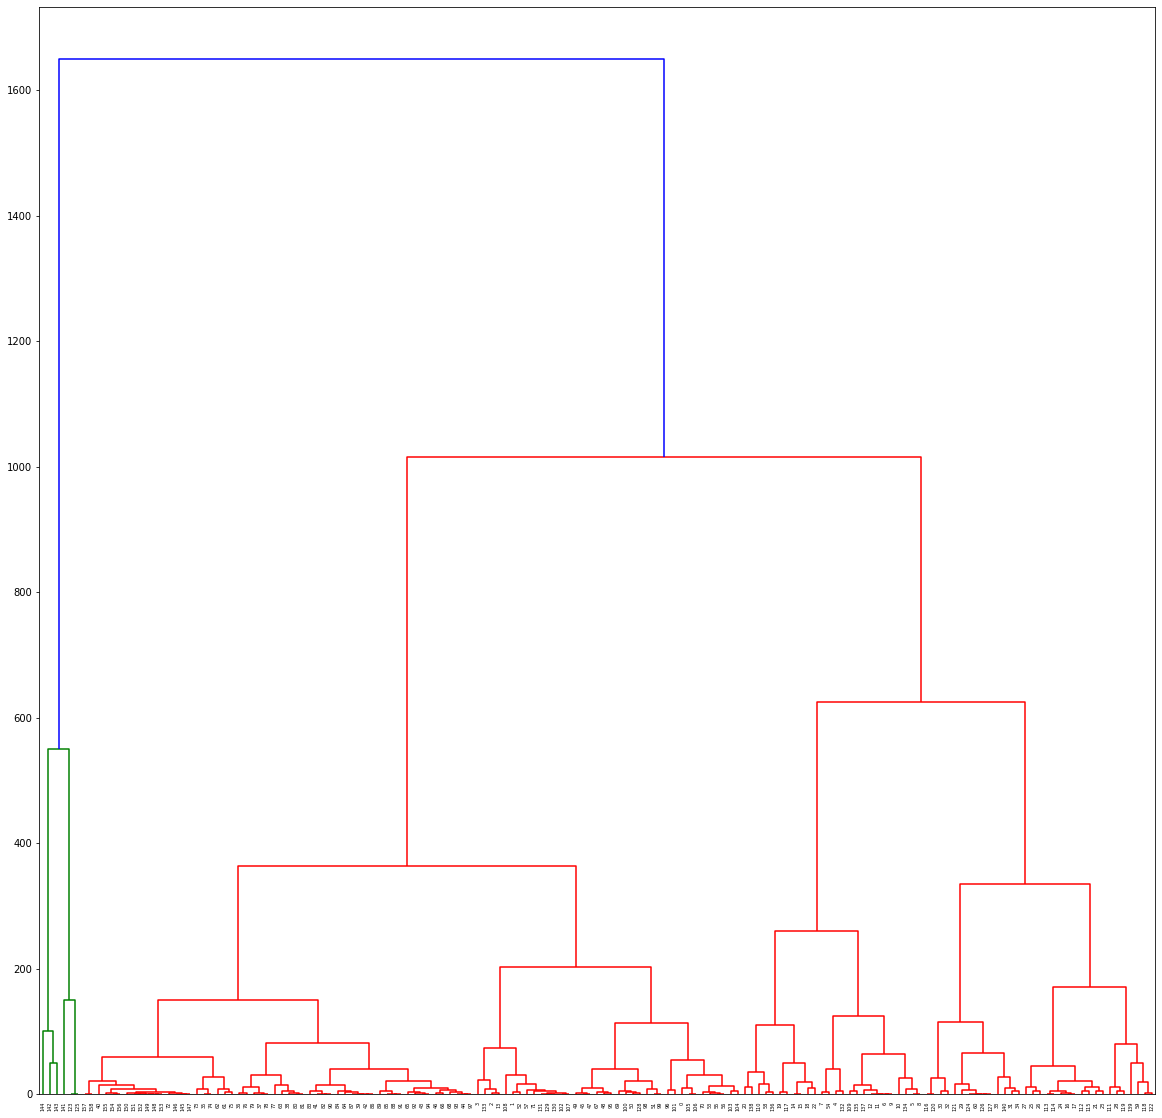

In [17]:
# let's check trees 

from scipy.cluster import hierarchy
hierar = hierarchy.linkage(data.iloc[:,[1,5]], 'complete')

plt.figure(figsize=(20,20))
dn = hierarchy.dendrogram(hierar)

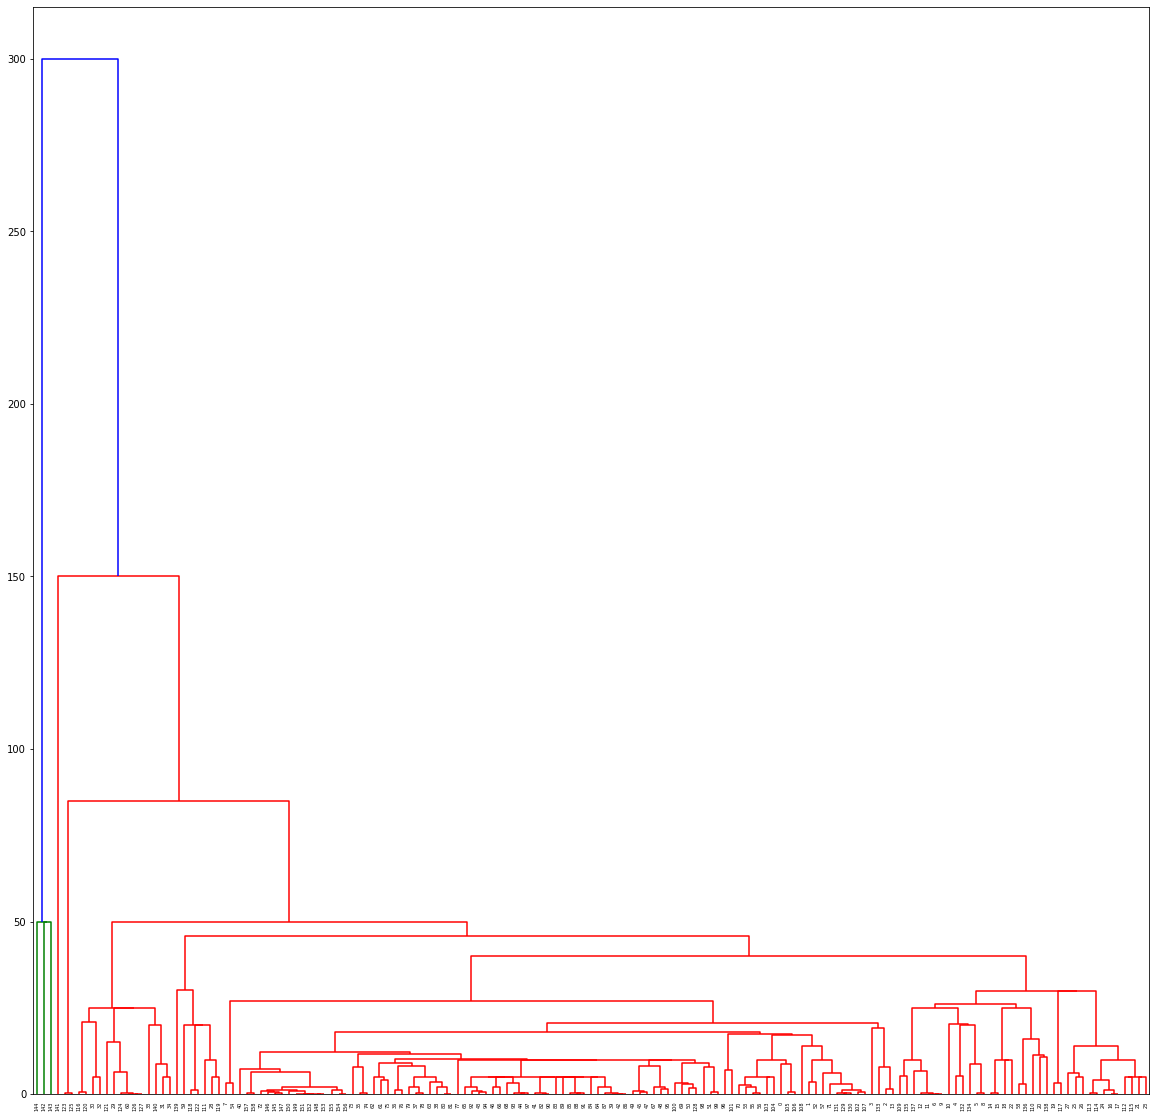

In [18]:
hierar = hierarchy.linkage(data.iloc[:,[1,5]], 'single')
plt.figure(figsize=(20,20))
dn = hierarchy.dendrogram(hierar)

In [19]:
## DBSCAN Clustering 
# Density Clustering

from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data 
iris_data_pd = pd.DataFrame(iris_data, columns = iris.feature_names)
print(iris_data_pd)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


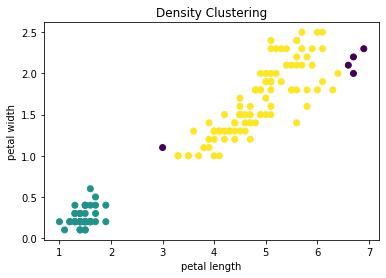

In [20]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps = 0.5, min_samples= 10)
db.fit(iris_data_pd.iloc[:,2:4])
y_pred = db.fit_predict(iris_data_pd.iloc[:,2:4])
plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
plt.title('Density Clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [21]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


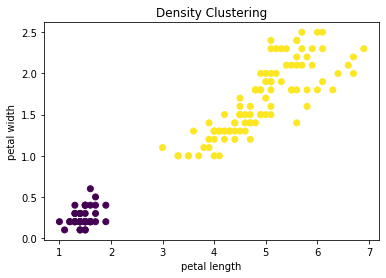

In [22]:
db.set_params( eps = 0.5, min_samples =5)
y_pred = db.fit_predict(iris_data_pd.iloc[:,2:4])
print(db.labels_)

plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
plt.title('Density Clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

[ 0  0  0  1  0 -1  0  1  0  1  1 -1  0 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1
 -1 -1 -1  1  0 -1 -1 -1  1  0  1 -1  0  0  0  1  0  0  0 -1 -1  0 -1  0
  1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


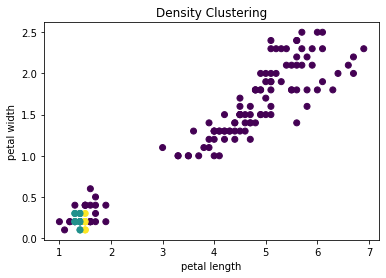

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


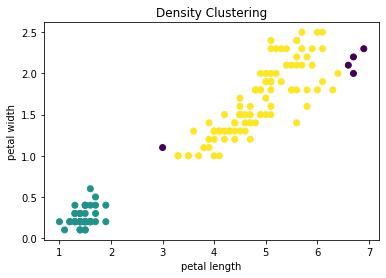

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


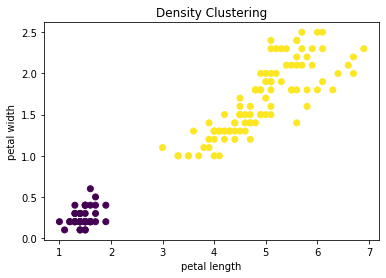

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


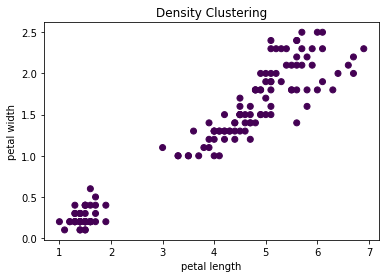

In [23]:
eps = [0.1, 0.5, 1.0, 1.5]
for idx, i in enumerate(eps):
  plt.figure(idx)
  db.set_params(eps=i, min_samples=10)
  y_pred = db.fit_predict(iris_data_pd.iloc[:,2:4])
  print(db.labels_)
  plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
  plt.title('Density Clustering')
  plt.xlabel('petal length')
  plt.ylabel('petal width')
  plt.show()

In [106]:
from sklearn import preprocessing
df = pd.read_csv('Fish.csv', sep=',')

# 설명변수 정규화
X = df.iloc[:,1:]
X = preprocessing.StandardScaler().fit(X).transform(X)
db = DBSCAN(eps=0.5, min_samples=4)      
db.fit(X)
y_pred = db.fit_predict(X)

db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  2,  4, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  2,  2,  2,  2,  4,  2,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4, -1,  5,  5,  5, -1,  5,  6,  6,
        6,  6,  6, -1, -1, -1, -1, -1, -1,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  0,  0])